In [1]:
#!pip install skimpy

In [2]:
import pandas as pd
import glob
from skimpy import clean_columns
from IPython import display

# choose csv file

In [3]:
file_names = glob.glob('download/*.csv')
file_names

['download/ChicagoCensusData.csv',
 'download/ChicagoPublicSchools.csv',
 'download/ChicagoCrimeData.csv']

In [4]:
messy_col_df = pd.read_csv(file_names[0])
messy_col_df.head(3)

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0


# column name cleaning by Skimpy

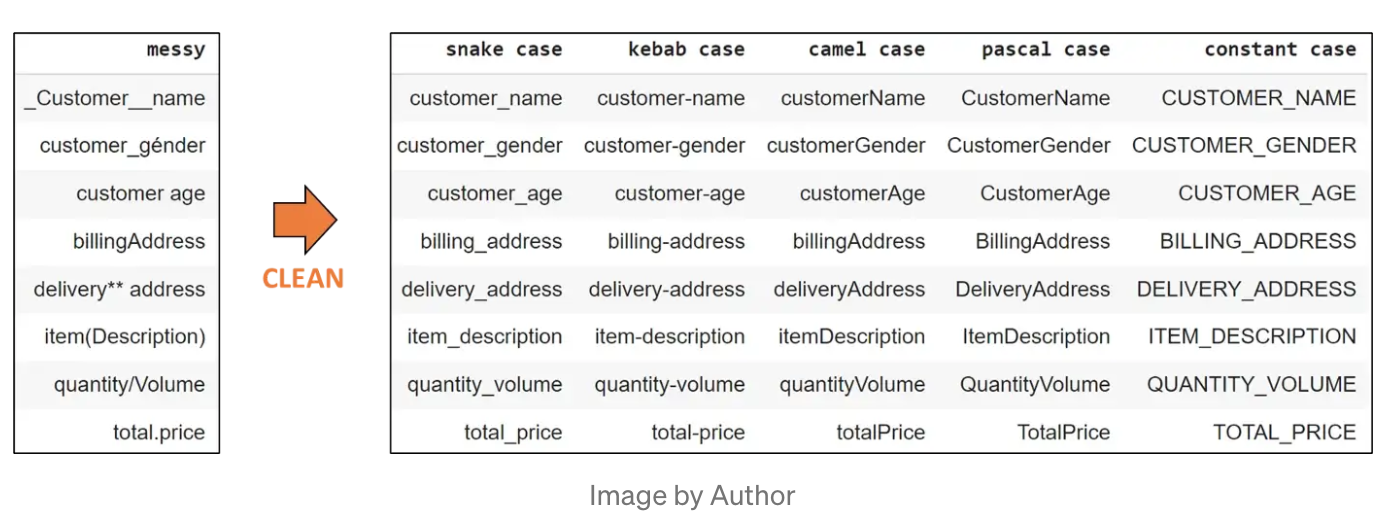

In [5]:
display.Image("skimpy_cases.png",width = 400, height = 300)

In [6]:
clean_col_df = clean_columns(messy_col_df, case='snake')
clean_col_df.head(3)

9 column names have been cleaned

,community_area_number,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0


# view data info

In [7]:
clean_col_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   community_area_number                        77 non-null     float64
 1   community_area_name                          78 non-null     object 
 2   percent_of_housing_crowded                   78 non-null     float64
 3   percent_households_below_poverty             78 non-null     float64
 4   percent_aged_16_unemployed                   78 non-null     float64
 5   percent_aged_25_without_high_school_diploma  78 non-null     float64
 6   percent_aged_under_18_or_over_64             78 non-null     float64
 7   per_capita_income                            78 non-null     int64  
 8   hardship_index                               77 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB


In [8]:
clean_col_df.shape

(78, 9)

# convert dtype into SQL create table statement

In [9]:
dict_type_convert = {'int64':'int','object':'varchar(300)','bool':'varchar(20)','float64':'float'}

In [19]:
schema_name = 'city_index'
table_name = 'census_data'

print('%%sql')
print('create table '+schema_name+'.'+table_name+' (')
for i,col in enumerate(clean_col_df.columns):
    if i < len(clean_col_df.columns)-1:
        print('   '+'"'+col+'"',dict_type_convert[str(clean_col_df[[col]].dtypes[0])]+",")
    else:
        print('   '+'"'+col+'"',dict_type_convert[str(clean_col_df[[col]].dtypes[0])])
print(')')

%%sql
create table city_index.census_data (
   "community_area_number" float,
   "community_area_name" varchar(300),
   "percent_of_housing_crowded" float,
   "percent_households_below_poverty" float,
   "percent_aged_16_unemployed" float,
   "percent_aged_25_without_high_school_diploma" float,
   "percent_aged_under_18_or_over_64" float,
   "per_capita_income" int,
   "hardship_index" float
)
